In [92]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
import re
import numpy as np
from nltk.probability import FreqDist
from nltk import ngrams
from wordcloud import WordCloud
from nltk.corpus import brown

In [5]:
with open ("debat2.txt", encoding = 'utf-8', errors='ignore') as f:
    debat = f.read()
debat = debat.lower()

In [204]:
'''Get the summary of the text'''

def get_summary(debat, pct):
    summary = summarize(debat,ratio=pct,split=True)
    return summary

'''Get the keywords of the text'''

def get_keywords(debat):
    res = keywords(debat, ratio=0.1, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

'''Tokenize the sentence into words & remove punctuation'''

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

def split_into_tokens(text):
    """ Split text into tokens.
    """
    tokens = nltk.word_tokenize(debat)
    return tokens
    
def POS_tagging(text):
    """ Generate Part of speech tagging of the text.
    """
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

def get_lemmatize(text):
    lem = WordNetLemmatizer()
    nLem = [] 
    for i in text:
        nLem.append(lem.lemmatize(i, 'v'))
    return nLem

def get_stop_words(text):
    stop_words = set(stopwords.words('english'))
    filtered = [i for i in text if not i in stop_words]
    return filtered

def remove_punctuation(text):
    punct = re.compile(r'[-.?!,:;()%|0-9]')
    rem_punct = []
    for i in text:
        word = punct.sub("", i)
        if len(word) > 0:
            rem_punct.append(word)
    return rem_punct

def get_fdist(text):
    fdist= FreqDist()
    for i in text:
        fdist[i.lower()]+=1
    return fdist

def get_normalize(text):
    my_new_text = re.sub('[^ a-zA-Z0-9]', '', text)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(str(my_new_text)) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    lemma = WordNetLemmatizer()
    normalized = " ".join(lemma.lemmatize(word)for word in filtered_sentence)
    return normalized

def get_nGram(text):
    n = 5
    total_grams = []
    number_of_grams = ngrams(normalized.split(), n)
    for grams in number_of_grams:
        total_grams.append(grams)
    return total_grams

def show_wordcloud(text):
    wordcloud = WordCloud(max_font_size=60).generate(normalized)
    plt.figure(figsize=(16,12))
    '''plot wordcloud in matplotlib'''
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
def get_frequency(text, jmlKata):
    count = {}
    for w in normalized.split():
        if w in count:
            count[w] += 1
        else:
            count[w] = 1
    topics.clear()
    for word, times in count.items():
        if times > jmlKata:
            freq = print("%s was found %d times" % (word, times))
            topics.append(word)
    return freq
topics=[] 
def get_dispersion(text):
    cfd = nltk.ConditionalFreqDist((genre, word)
                                   for genre in brown.categories() 
                                   for word in brown.words(categories=genre))
    genres = ['adventure', 'belles_lettres', 
              'editorial', 'fiction', 'government', 
              'hobbies','humor', 'learned', 'lore', 
              'mystery', 'news', 'religion', 'reviews', 
              'romance','science_fiction']
    a=cfd.tabulate(conditions=genres, samples = topics)

In [21]:
summary = get_summary(debat, 0.3)
summary

['for four and a half years i with pak jusuf kalla have tried hard to have struggled in order to restore the original character of development in our country indonesia, which is not relying on economic growth alone but also relying on equity because economic growth without equality is a good inequality that is inequality between rich and poor inequality between regions and will also cause what is called injustice.',
 'therefore we build infrastructure not in java alone not java centric but indonesia centric for what with infrastructure infrastructure we want there to be new economic growth points outside of java in the form of small industrial zones in the form of special economic zones in the form of special economic zones for tourism which it will also have an effect on handicrafts produced by villages and we also want to continue to fight for the independence of the indonesian economy, therefore strategic natural resources previously managed by foreigners are controlled by the state

In [18]:
split_sentences(debat)

['for four and a half years i with pak jusuf kalla have tried hard to have struggled in order to restore the original character of development in our country indonesia, which is not relying on economic growth alone but also relying on equity because economic growth without equality is a good inequality that is inequality between rich and poor inequality between regions and will also cause what is called injustice',
 ' therefore we build infrastructure not in java alone not java centric but indonesia centric for what with infrastructure infrastructure we want there to be new economic growth points outside of java in the form of small industrial zones in the form of special economic zones in the form of special economic zones for tourism which it will also have an effect on handicrafts produced by villages and we also want to continue to fight for the independence of the indonesian economy, therefore strategic natural resources previously managed by foreigners are controlled by the state

In [22]:
get_keywords(debat)

['good',
 'goods',
 'tax',
 'taxes',
 'cards',
 'card',
 'industrial',
 'industrialization',
 'industry',
 'economic',
 'economics',
 'trillion',
 'economy',
 'school',
 'schools',
 'indonesia',
 'big',
 'products',
 'productive',
 'production',
 'develop industries',
 'managed',
 'manages',
 'managing',
 'manage',
 'holding',
 'food',
 'program',
 'programs',
 'percent',
 'balance',
 'said',
 'commodity',
 'commodities',
 'build',
 'building',
 'builds',
 'subsidy',
 'micro',
 'means',
 'meaning',
 'development',
 'developing',
 'developed',
 'halal',
 'working',
 'works',
 'work',
 'training trainings',
 'trains',
 'large',
 'field',
 'fields',
 'ecosystem',
 'god',
 'provide',
 'income']

In [33]:
tokens= split_into_tokens(debat)
tokens

['for',
 'four',
 'and',
 'a',
 'half',
 'years',
 'i',
 'with',
 'pak',
 'jusuf',
 'kalla',
 'have',
 'tried',
 'hard',
 'to',
 'have',
 'struggled',
 'in',
 'order',
 'to',
 'restore',
 'the',
 'original',
 'character',
 'of',
 'development',
 'in',
 'our',
 'country',
 'indonesia',
 ',',
 'which',
 'is',
 'not',
 'relying',
 'on',
 'economic',
 'growth',
 'alone',
 'but',
 'also',
 'relying',
 'on',
 'equity',
 'because',
 'economic',
 'growth',
 'without',
 'equality',
 'is',
 'a',
 'good',
 'inequality',
 'that',
 'is',
 'inequality',
 'between',
 'rich',
 'and',
 'poor',
 'inequality',
 'between',
 'regions',
 'and',
 'will',
 'also',
 'cause',
 'what',
 'is',
 'called',
 'injustice',
 '.',
 'therefore',
 'we',
 'build',
 'infrastructure',
 'not',
 'in',
 'java',
 'alone',
 'not',
 'java',
 'centric',
 'but',
 'indonesia',
 'centric',
 'for',
 'what',
 'with',
 'infrastructure',
 'infrastructure',
 'we',
 'want',
 'there',
 'to',
 'be',
 'new',
 'economic',
 'growth',
 'points',


In [51]:
posTag=POS_tagging(tokens)

In [35]:
debat_lem = get_lemmatize(tokens)

In [39]:
stopWords=get_stop_words(debat_lem)

In [48]:
remPunct=remove_punctuation(stopWords)

In [50]:
fdist=get_fdist(remPunct)

In [72]:
normalized=get_normalize(debat)

In [83]:
ngram=get_nGram(normalized)

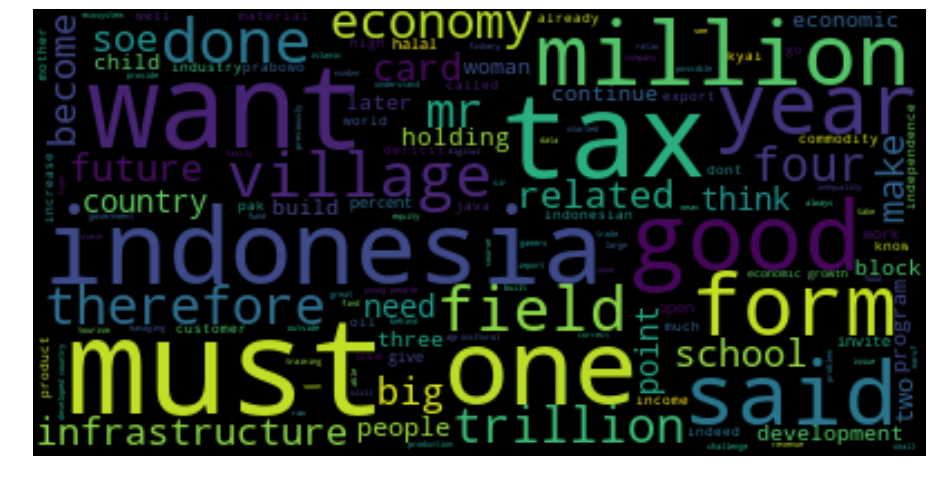

In [85]:
show_wordcloud(normalized)

In [209]:
get_frequency(normalized, 8)

year was found 9 times
country was found 9 times
indonesia was found 12 times
also was found 30 times
good was found 10 times
want was found 15 times
form was found 9 times
village was found 9 times
done was found 9 times
field was found 9 times
must was found 20 times
people was found 9 times
million was found 10 times
one was found 13 times
tax was found 15 times
said was found 10 times


In [210]:
topics

['year',
 'country',
 'indonesia',
 'also',
 'good',
 'want',
 'form',
 'village',
 'done',
 'field',
 'must',
 'people',
 'million',
 'one',
 'tax',
 'said']

In [211]:
get_dispersion(topics)

                     year   country indonesia      also      good      want      form   village      done     field      must    people   million       one       tax      said 
      adventure        11        16         0        19        37        43         7         4        15         6        27        24         4       162         0       287 
 belles_lettres        52        59         0       179       104        30        99        10        46        31       170       147         4       475         5       159 
      editorial        52        32         0        43        58        12         9         1        24        13        53        75        22       150        22        52 
        fiction         9        10         0         7        55        34         8         7        30         5        55        39         3       168         1       192 
     government       183        38         0        85        25         8        16         0         6        19

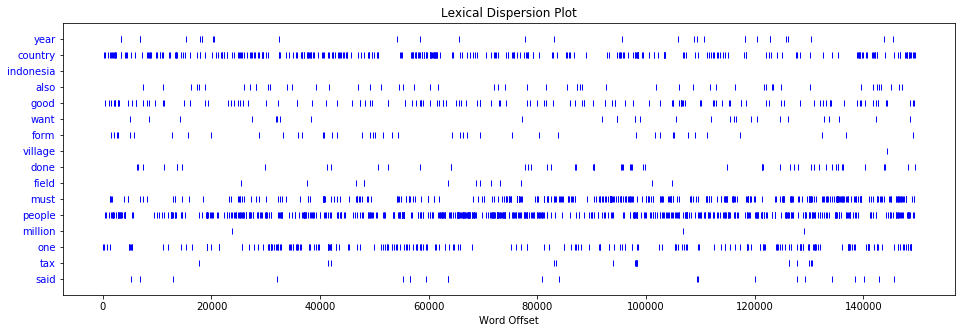

In [212]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
content.dispersion_plot(topics)

In [166]:
fil_sentence=get_stop_words(debat_lem)
fil_sentence

['four',
 'half',
 'years',
 'pak',
 'jusuf',
 'kalla',
 'try',
 'hard',
 'struggle',
 'order',
 'restore',
 'original',
 'character',
 'development',
 'country',
 'indonesia',
 ',',
 'rely',
 'economic',
 'growth',
 'alone',
 'also',
 'rely',
 'equity',
 'economic',
 'growth',
 'without',
 'equality',
 'good',
 'inequality',
 'inequality',
 'rich',
 'poor',
 'inequality',
 'regions',
 'also',
 'cause',
 'call',
 'injustice',
 '.',
 'therefore',
 'build',
 'infrastructure',
 'java',
 'alone',
 'java',
 'centric',
 'indonesia',
 'centric',
 'infrastructure',
 'infrastructure',
 'want',
 'new',
 'economic',
 'growth',
 'point',
 'outside',
 'java',
 'form',
 'small',
 'industrial',
 'zone',
 'form',
 'special',
 'economic',
 'zone',
 'form',
 'special',
 'economic',
 'zone',
 'tourism',
 'also',
 'effect',
 'handicrafts',
 'produce',
 'villages',
 'also',
 'want',
 'continue',
 'fight',
 'independence',
 'indonesian',
 'economy',
 ',',
 'therefore',
 'strategic',
 'natural',
 'resources'

In [168]:
tokenize_sent=list(sent_to_words(fil_sentence))
tokenize_sent

[['four'],
 ['half'],
 ['years'],
 ['pak'],
 ['jusuf'],
 ['kalla'],
 ['try'],
 ['hard'],
 ['struggle'],
 ['order'],
 ['restore'],
 ['original'],
 ['character'],
 ['development'],
 ['country'],
 ['indonesia'],
 [],
 ['rely'],
 ['economic'],
 ['growth'],
 ['alone'],
 ['also'],
 ['rely'],
 ['equity'],
 ['economic'],
 ['growth'],
 ['without'],
 ['equality'],
 ['good'],
 ['inequality'],
 ['inequality'],
 ['rich'],
 ['poor'],
 ['inequality'],
 ['regions'],
 ['also'],
 ['cause'],
 ['call'],
 ['injustice'],
 [],
 ['therefore'],
 ['build'],
 ['infrastructure'],
 ['java'],
 ['alone'],
 ['java'],
 ['centric'],
 ['indonesia'],
 ['centric'],
 ['infrastructure'],
 ['infrastructure'],
 ['want'],
 ['new'],
 ['economic'],
 ['growth'],
 ['point'],
 ['outside'],
 ['java'],
 ['form'],
 ['small'],
 ['industrial'],
 ['zone'],
 ['form'],
 ['special'],
 ['economic'],
 ['zone'],
 ['form'],
 ['special'],
 ['economic'],
 ['zone'],
 ['tourism'],
 ['also'],
 ['effect'],
 ['handicrafts'],
 ['produce'],
 ['villages'

In [170]:
dictionary = corpora.Dictionary(tokenize_sent)
dictionary

In [174]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenize_sent]


In [175]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix by selecting minimum parameters required.
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=100)

In [176]:
print(ldamodel.print_topics(num_topics=4, num_words=20))

[(0, '0.024*"million" + 0.018*"mr" + 0.016*"four" + 0.016*"become" + 0.016*"future" + 0.014*"two" + 0.014*"export" + 0.014*"give" + 0.014*"point" + 0.011*"open" + 0.011*"halal" + 0.011*"growth" + 0.011*"us" + 0.011*"later" + 0.011*"products" + 0.011*"use" + 0.011*"years" + 0.011*"invite" + 0.009*"deficit" + 0.009*"year"'), (1, '0.037*"must" + 0.028*"want" + 0.024*"one" + 0.022*"say" + 0.022*"indonesia" + 0.019*"build" + 0.017*"form" + 0.017*"people" + 0.015*"trillion" + 0.015*"therefore" + 0.015*"economic" + 0.013*"work" + 0.013*"hold" + 0.013*"relate" + 0.013*"card" + 0.013*"big" + 0.011*"develop" + 0.010*"yes" + 0.010*"take" + 0.008*"train"'), (2, '0.069*"also" + 0.021*"field" + 0.017*"continue" + 0.017*"school" + 0.014*"think" + 0.014*"need" + 0.014*"soes" + 0.012*"three" + 0.010*"much" + 0.010*"see" + 0.010*"independence" + 0.010*"income" + 0.010*"increase" + 0.010*"oil" + 0.010*"mother" + 0.010*"indonesian" + 0.007*"digital" + 0.007*"zone" + 0.007*"gamers" + 0.007*"industry"'), (3

In [177]:
'''Compute Perplexity'''

# a measure of how good the model is. lower the better.

print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenize_sent, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.192744569719159

Coherence Score:  0.8508330954907951


In [178]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.221703  0.004824       1        1  27.721781
3     -0.080172  0.180552       2        1  24.812941
0     -0.074387 -0.132386       3        1  24.155787
2     -0.067144 -0.052991       4        1  23.309494, topic_info=    Category       Freq            Term      Total  loglift  logprob
20   Default  21.000000            also  21.000000  30.0000  30.0000
146  Default  13.000000            must  13.000000  29.0000  29.0000
240  Default  10.000000             tax  10.000000  28.0000  28.0000
37   Default  10.000000            want  10.000000  27.0000  27.0000
186  Default   8.000000         million   8.000000  26.0000  26.0000
209  Default   9.000000             one   9.000000  25.0000  25.0000
244  Default   8.000000             say   8.000000  24.0000  24.0000
15   Default   8.000000       indonesia   8.000000  23.0000  23.0000
55   Default   7.000000         economy   7.000000  22.0000  22.0000
72   Default   6.000000           field   6.000000  21.0000  21.0000
14   Default   6.000000         country   6.000000  20.0000  20.0000
33   Default   7.000000           build   7.000000  19.0000  19.0000
242  Default   6.000000              mr   6.000000  18.0000  18.0000
95   Default   5.000000          school   5.000000  17.0000  17.0000
51   Default   5.000000        continue   5.000000  16.0000  16.0000
41   Default   6.000000            form   6.000000  15.0000  15.0000
160  Default   6.000000          people   6.000000  14.0000  14.0000
330  Default   5.000000          become   5.000000  13.0000  13.0000
0    Default   5.000000            four   5.000000  12.0000  12.0000
131  Default   5.000000          future   5.000000  11.0000  11.0000
165  Default   5.000000            make   5.000000  10.0000  10.0000
78   Default   5.000000            like   5.000000   9.0000   9.0000
34   Default   5.000000  infrastructure   5.000000   8.0000   8.0000
251  Default   5.000000        trillion   5.000000   7.0000   7.0000
32   Default   5.000000       therefore   5.000000   6.0000   6.0000
17   Default   5.000000        economic   5.000000   5.0000   5.0000
468  Default   4.000000            soes   4.000000   4.0000   4.0000
136  Default   4.000000            need   4.000000   3.0000   3.0000
112  Default   4.000000           think   4.000000   2.0000   2.0000
122  Default   4.000000          export   4.000000   1.0000   1.0000
..       ...        ...             ...        ...      ...      ...
468   Topic4   4.382041            soes   4.893027   1.3460  -4.2493
136   Topic4   4.382041            need   4.893027   1.3460  -4.2493
112   Topic4   4.382041           think   4.893027   1.3460  -4.2493
197   Topic4   3.680814           three   4.191805   1.3263  -4.4237
106   Topic4   2.979584          mother   3.490582   1.2980  -4.6350
220   Topic4   2.979584          income   3.490582   1.2980  -4.6350
239   Topic4   2.979584        increase   3.490582   1.2980  -4.6350
54    Topic4   2.979584      indonesian   3.490582   1.2980  -4.6350
128   Topic4   2.979584             oil   3.490582   1.2980  -4.6350
366   Topic4   2.979584             see   3.490582   1.2980  -4.6350
259   Topic4   2.979584            much   3.490582   1.2980  -4.6350
53    Topic4   2.979584    independence   3.490582   1.2980  -4.6350
46    Topic4   2.278350         tourism   2.789357   1.2539  -4.9034
25    Topic4   2.278350      inequality   2.789357   1.2539  -4.9034
79    Topic4   2.278350            hope   2.789357   1.2539  -4.9034
309   Topic4   2.278350           great   2.789357   1.2539  -4.9034
40    Topic4   2.278350         outside   2.789357   1.2539  -4.9034
358   Topic4   2.278350          gamers   2.789357   1.2539  -4.9034
304   Topic4   2.278350          please   2.789357   1.2539  -4.9034
515   Topic4   2.278350       challenge   2.789357   1.2539  -4.9034
123   Topic4   2.278350             raw   2.7